In [1]:
from glob import glob
from shutil import copyfile
from tqdm import tqdm
import os
import re
import json

In [2]:
def convert_to_txt(annotations, wid, hei):
    txt_data = ''
    for annotation in annotations:
        bbox = annotation['annotation.bbox']
        text = annotation['annotation.text']
        if len(text.strip()) > 0:
            x, y, w, h = bbox[0],bbox[1],bbox[2],bbox[3]
            if x+w <= wid and y+h <= hei and w > 0 and h > 0:
                txt_data += f"{x},{y},{x+w},{y},{x+w},{y+h},{x},{y+h},{text}\n"
            else:
                print('error')
    if len(txt_data) > 0:
        return txt_data
    else:
        return False

In [5]:
data_dir = './data'
train_img, train_gt, test_img, test_gt = [os.path.join(data_dir, '2_txt_format', i) for i in ['ch4_training_images','ch4_training_localization_transcription_gt','ch4_test_images','ch4_test_localization_transcription_gt']]
json_files = glob(os.path.join(data_dir,'1_raw/label/인.허가/*/*/*'))
train_ratio = 0.95

# train
for idx, json_file_name in tqdm(enumerate(json_files[:int(len(json_files)*train_ratio)]), total = int(len(json_files)*train_ratio)):
    try:
        img_file_name = re.sub('label','imgs',json_file_name)
        img_file_name = re.sub('json','jpg',img_file_name)
        with open(json_file_name, encoding = 'utf-8') as f:
            json_object = json.load(f)
            
        w, h = json_object['images'][0]['image.width'], json_object['images'][0]['image.height']
        txt_result = convert_to_txt(json_object['annotations'], w, h)
        if txt_result:
            img_name, txt_name = [os.path.join(path, name + '_{:09}.{}'.format(idx,ext)) for path, name, ext in zip([train_img, train_gt],['img','gt_img'],['jpg','txt'])]

            with open(txt_name, 'w', encoding = 'utf-8') as file:
                file.write(txt_result)

            copyfile(img_file_name, img_name)
    except Exception as e:
        print('오류 발생:', e)

# test
for idx, json_file_name in tqdm(enumerate(json_files[int(len(json_files)*train_ratio):]), total = len(json_files) - int(len(json_files)*train_ratio)):
    try:
        img_file_name = re.sub('label','imgs',json_file_name)
        img_file_name = re.sub('json','jpg',img_file_name)
        with open(json_file_name, encoding = 'utf-8') as f:
            json_object = json.load(f)

        w, h = json_object['images'][0]['image.width'], json_object['images'][0]['image.height']
        txt_result = convert_to_txt(json_object['annotations'], w, h)
        if txt_result:
            img_name, txt_name = [os.path.join(path, name + '_{:09}.{}'.format(idx,ext)) for path, name, ext in zip([test_img, test_gt],['img','gt_img'],['jpg','txt'])]

            with open(txt_name, 'w', encoding = 'utf-8') as file:
                file.write(txt_result)

            copyfile(img_file_name, img_name)
    except Exception as e:
        print('오류 발생:', e)

 11%|████████▎                                                                   | 3521/32131 [00:13<02:00, 237.72it/s]

error


 22%|████████████████▊                                                           | 7129/32131 [00:30<01:49, 228.64it/s]

error


 40%|█████████████████████████████▊                                             | 12798/32131 [00:55<01:26, 222.39it/s]

error


 46%|██████████████████████████████████▌                                        | 14810/32131 [01:04<01:15, 228.95it/s]

error


 50%|█████████████████████████████████████▍                                     | 16044/32131 [01:10<01:07, 238.49it/s]

error


 60%|████████████████████████████████████████████▊                              | 19222/32131 [01:24<01:02, 206.87it/s]

error


 65%|████████████████████████████████████████████████▍                          | 20772/32131 [01:31<00:48, 233.03it/s]

error


 74%|███████████████████████████████████████████████████████▌                   | 23803/32131 [01:44<00:34, 242.53it/s]

error


 86%|████████████████████████████████████████████████████████████████▋          | 27687/32131 [02:01<00:19, 228.16it/s]

error


100%|█████████████████████████████████████████████████████████████████████████████| 1692/1692 [00:07<00:00, 223.56it/s]


In [128]:
json_object

{'images': [{'image.make.code': '9931765',
   'image.make.year': '1998',
   'image.category': '인.허가',
   'image.width': 2480,
   'image.height': 3504,
   'image.file.name': '9931765-1998-0001-0009.jpg',
   'image.create.time': '2020-12-22 02:51:13'}],
 'annotations': [{'id': 0,
   'annotation.type': 'rectangle',
   'annotation.text': '협조문용지',
   'annotation.ttype': 'textType1',
   'annotation.bbox': [942, 354, 425, 75]},
  {'id': 1,
   'annotation.type': 'rectangle',
   'annotation.text': '(',
   'annotation.ttype': 'textType1',
   'annotation.bbox': [935, 476, 38, 50]},
  {'id': 2,
   'annotation.type': 'rectangle',
   'annotation.text': '12',
   'annotation.ttype': 'textType1',
   'annotation.bbox': [782, 588, 119, 75]},
  {'id': 3,
   'annotation.type': 'rectangle',
   'annotation.text': '분류기호',
   'annotation.ttype': 'textType1',
   'annotation.bbox': [285, 407, 181, 53]},
  {'id': 4,
   'annotation.type': 'rectangle',
   'annotation.text': '도시 30420 -',
   'annotation.ttype': 'tex

협조문용지


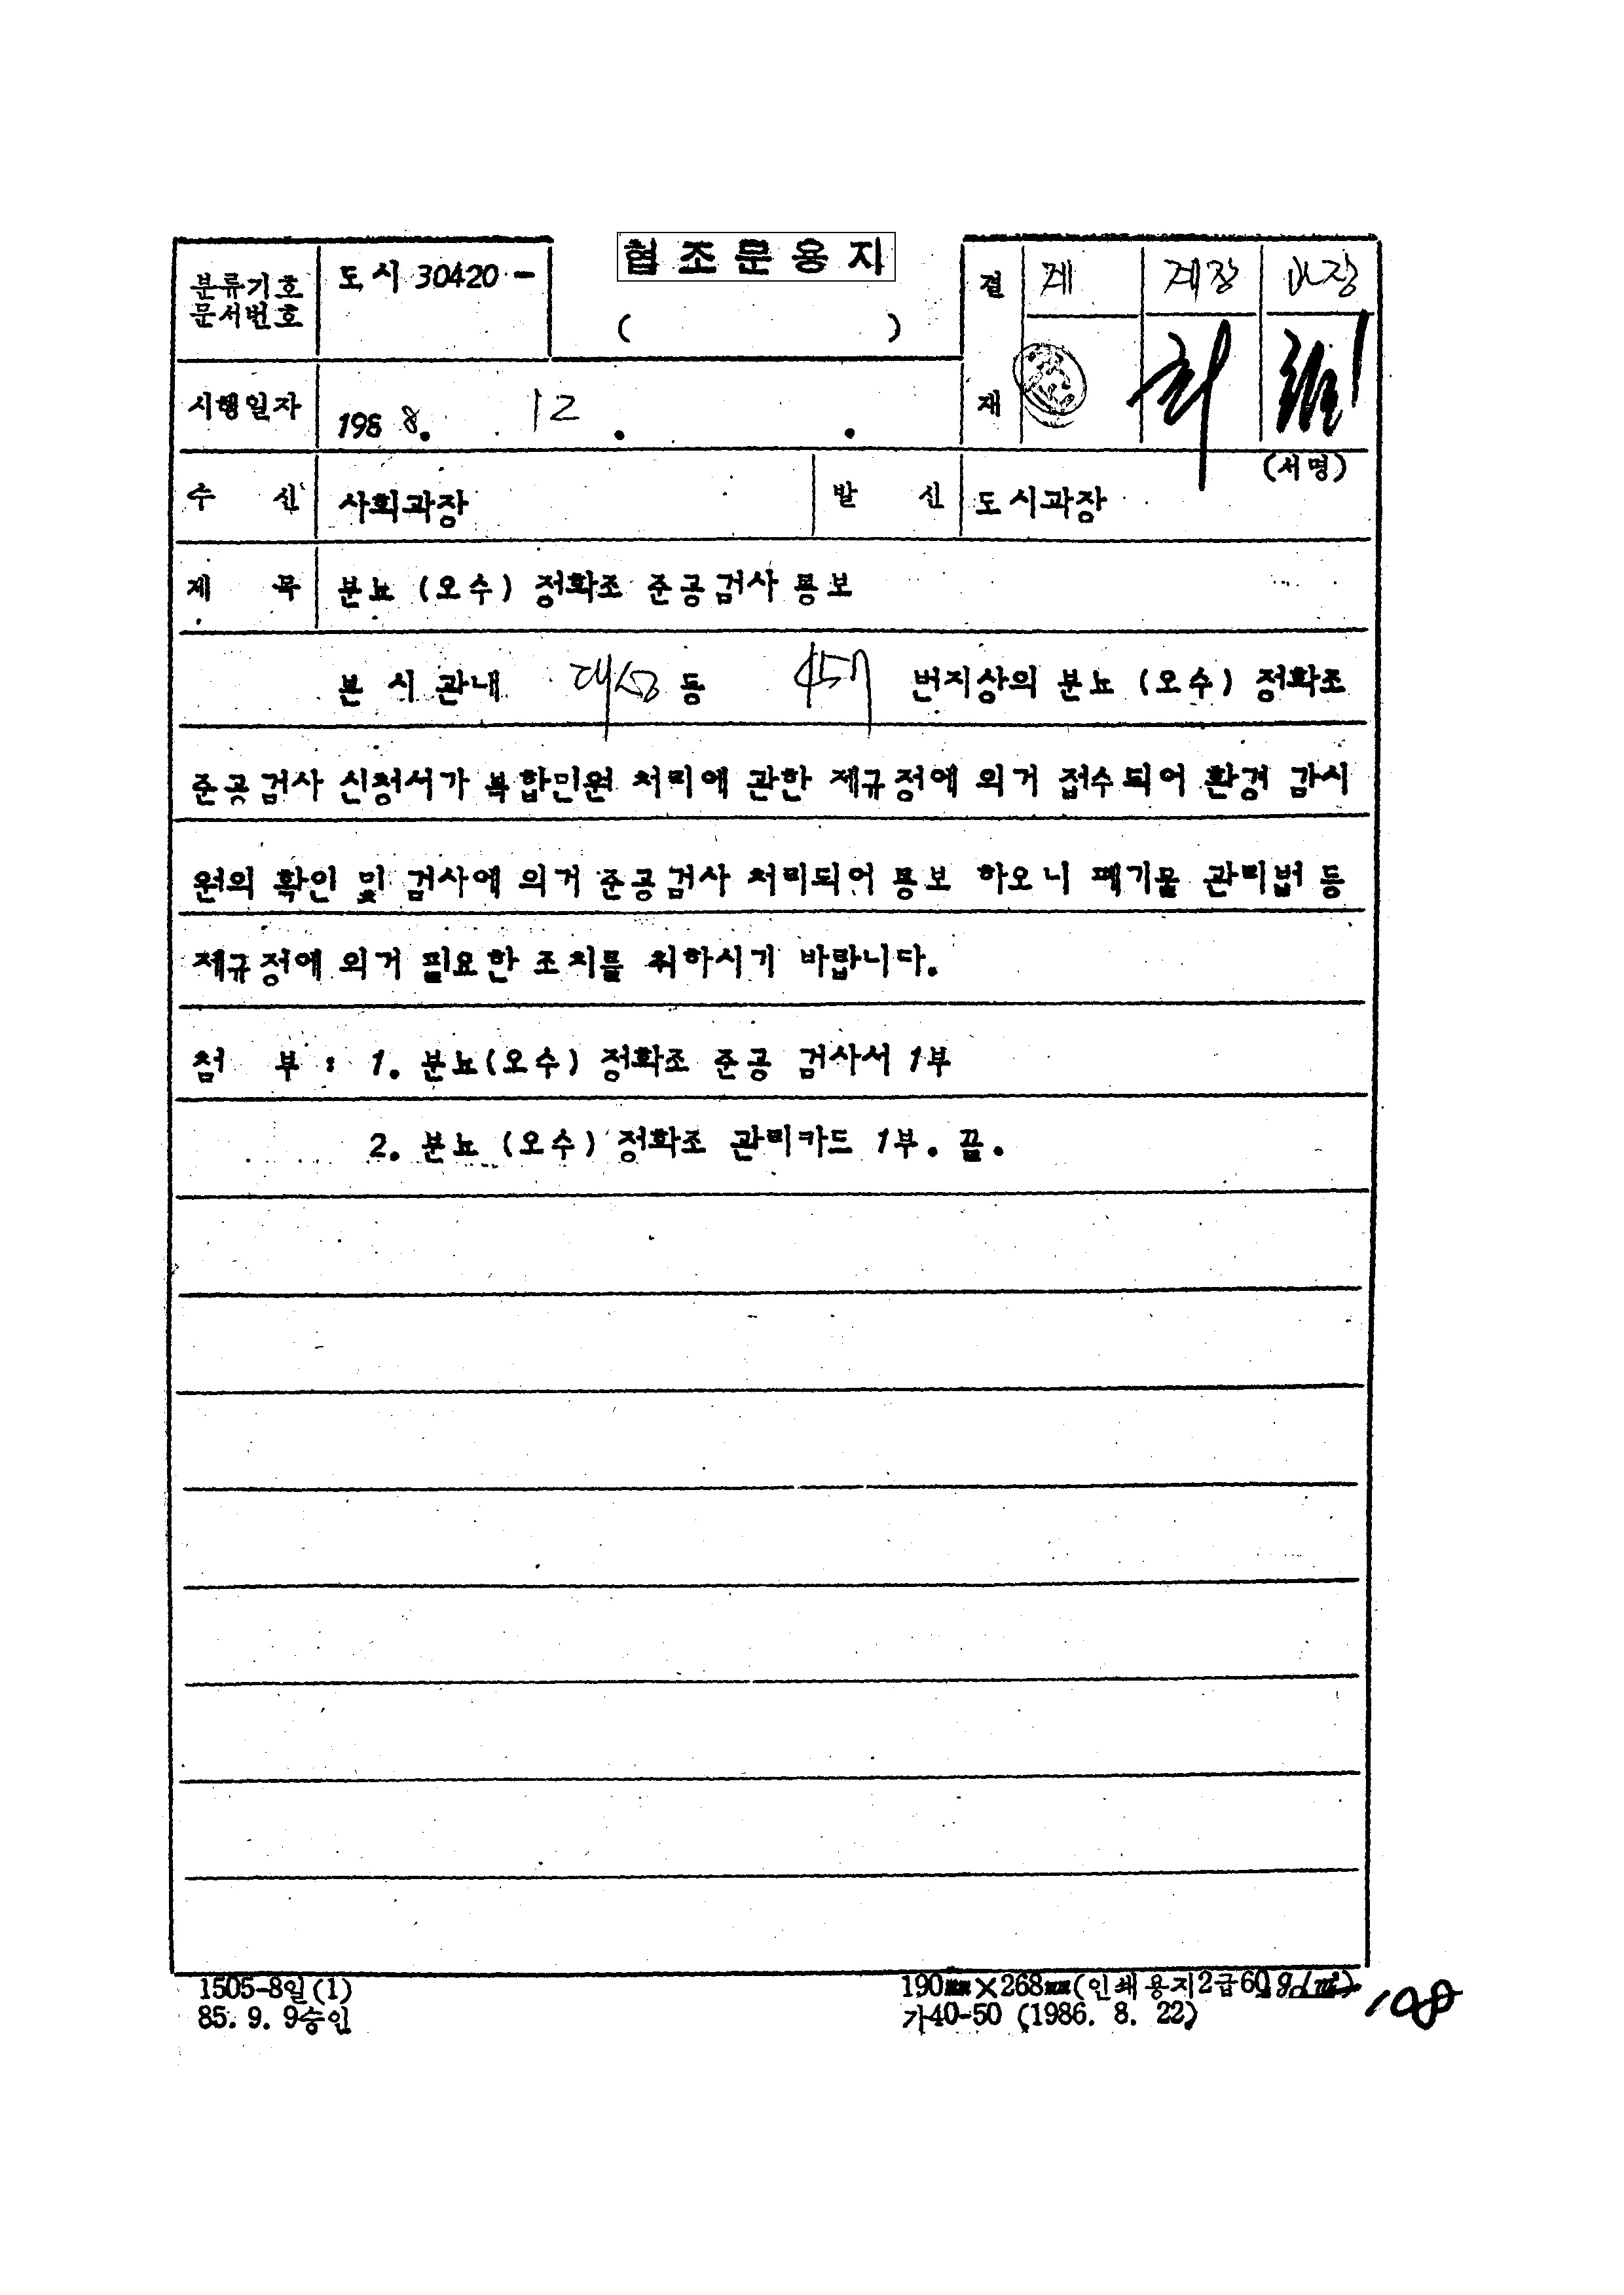

In [6]:
from PIL import Image, ImageDraw
import cv2
img = Image.fromarray(cv2.imread(img_name))
draw = ImageDraw.Draw(img)
for row in txt_result.split('\n'):
    try:
        row = row.split(',')
        x_min, y_min, x_max, y_max = int(row[0]),int(row[1]),int(row[4]),int(row[5])
        draw.rectangle(((x_min, y_min), (x_max, y_max)), outline=tuple([0]), width=2)
        print(row[-1])
        break
    except:
        pass
img

In [125]:
text

NameError: name 'text' is not defined

In [119]:
x, y, w, h

(942, 354, 75, 425)